In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# <font style ="color:#eb6b34; font-size:24px" >Males and females participated in the test</font>

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

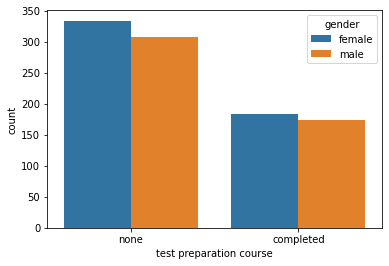

In [4]:
sns.countplot(x = "test preparation course", hue = "gender" , data = df)

In [5]:
df.groupby(["gender","test preparation course"]).count()

race/ethnicity  parental level of education  \
gender test preparation course                                                
female completed                           184                          184   
       none                                334                          334   
male   completed                           174                          174   
       none                                308                          308   

                                lunch  math score  reading score  \
gender test preparation course                                     
female completed                  184         184            184   
       none                       334         334            334   
male   completed                  174         174            174   
       none                       308         308            308   

                                writing score  
gender test preparation course                 
female completed                          184  
       none                               334  
male   completed                          174  
       none                               308

In [6]:
df.groupby('gender')['test preparation course'].apply(lambda x: x[x == 'completed'].count())

gender
female    184
male      174
Name: test preparation course, dtype: int64

In [7]:
# 184 females and 174 males completed the test . But approximately the double number of students than the students
# who completed the test have not even participated in the test on both male and female category

# <font style ="color:#56a666; font-size:24px" >Insight on students' parental level of education</font>

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

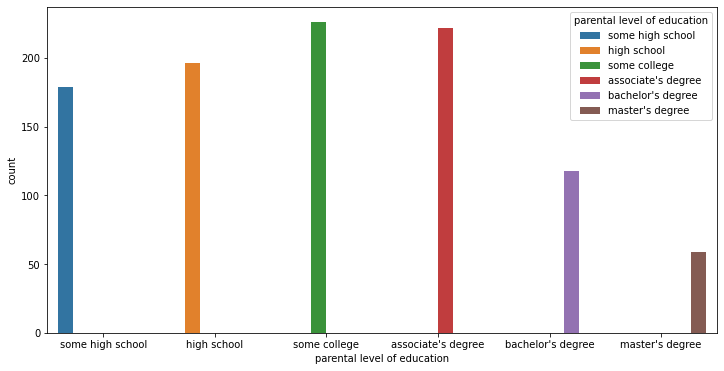

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x = "parental level of education", hue = "parental level of education", data =df)

In [9]:
df['parental level of education'].mode()

0    some college
dtype: object

In [10]:
# Some college is the instance that occured most and then comes associate degree. In general we could say majority
# of the students parents have went to a college

# <font style ="color:#32a889; font-size:24px" >Scores the most on average for math, reading and writing based on</font>

# <font style ="color:#32a889; font-size:24px" ><u>Gender</u></font>

In [11]:
df.groupby("gender").mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [12]:
""" 
Female students have got higher average scores for reading and writing. But the male students outdistanced the
on Maths

"""

' \nFemale students have got higher average scores for reading and writing. But the male students outdistanced the\non Maths\n\n'

# <font style = "color:#32a889; font-size:24px"><u>Test preparation course</u></font>

In [13]:
df.groupby("test preparation course").mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


In [14]:
# The students who completed the test preparation course has got higher average on all the three
# compared to students who haven't completed the test preparation course

# <font style = "color:#ff843d; font-size:24px">Scoring variation for math, reading and writing based on:</font>

# <font style = "color:#ff843d; font-size:24px"><u>Gender</u></font>

In [15]:
df.groupby("gender").std()

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


In [16]:
df.groupby("gender").var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


In [21]:
df.groupby("gender")[["math score","reading score","writing score"]].max()

,math score,reading score,writing score
gender,,,
female,100,100,100
male,100,100,100


In [22]:
df.groupby("gender")[["math score","reading score","writing score"]].min()

,math score,reading score,writing score
gender,,,
female,0,17,10
male,27,23,15


In [23]:
"""
From the minimun and maximun scores for maths,reading and writing its understood that the range of values they 
contain is wide for both female and males. The standard deviation for males are in the 14's for all 3 subjects.
For female the std deviation of maths is higher which suggest the the marks they obtianed in maths has got more
extreme values than for the males
 
"""

"\nFrom the minimun and maximun scores for maths,reading and writing its understood that the range of values they \ncontain is wide for both female and males. The standard deviation for males are in the 14's for all 3 subjects.\nFor female the std deviation of maths is higher which suggest the the marks they obtianed in maths has got more\nextreme values than for the males\n \n"

# <font style = "color:#ff843d; font-size:24px"><u>Test preparation course</u></font>

In [24]:
df.groupby("test preparation course").std()

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


In [25]:
df.groupby("test preparation course").var()

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


In [26]:
df.groupby("test preparation course")[["math score","reading score","writing score"]].max()

,math score,reading score,writing score
test preparation course,,,
completed,100,100,100
none,100,100,100


In [27]:
df.groupby("test preparation course")[["math score","reading score","writing score"]].min()

,math score,reading score,writing score
test preparation course,,,
completed,23,37,36
none,0,17,10


In [28]:
"""
The students who completed the tes preperation score has got a higher minimum mark than the students who
haven't completed it. Maximum mark for both are same.Standard deviation of the students who completed test
preperation course is less than the students who haven't done test preperation. It suggests that the scores of
students who completed the test preperation are near to their aerage value. But for others it's not like that


"""

"\nThe students who completed the tes preperation score has got a higher minimum mark than the students who\nhaven't completed it. Maximum mark for both are same.Standard deviation of the students who completed test\npreperation course is less than the students who haven't done test preperation. It suggests that the scores of\nstudents who completed the test preperation are near to their aerage value. But for others it's not like that\n\n\n"

# <font style = "color:#9f5fc9; font-size:24px">Top 25% of students based on their maths score</font>

In [38]:
df.sort_values(by = "math score",ascending=False).head(250)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73
